# Загрузка данных

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv("data/wineqr/wineqr.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

y = df["quality"]
x = df.drop("quality", axis=1)
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


<AxesSubplot:>

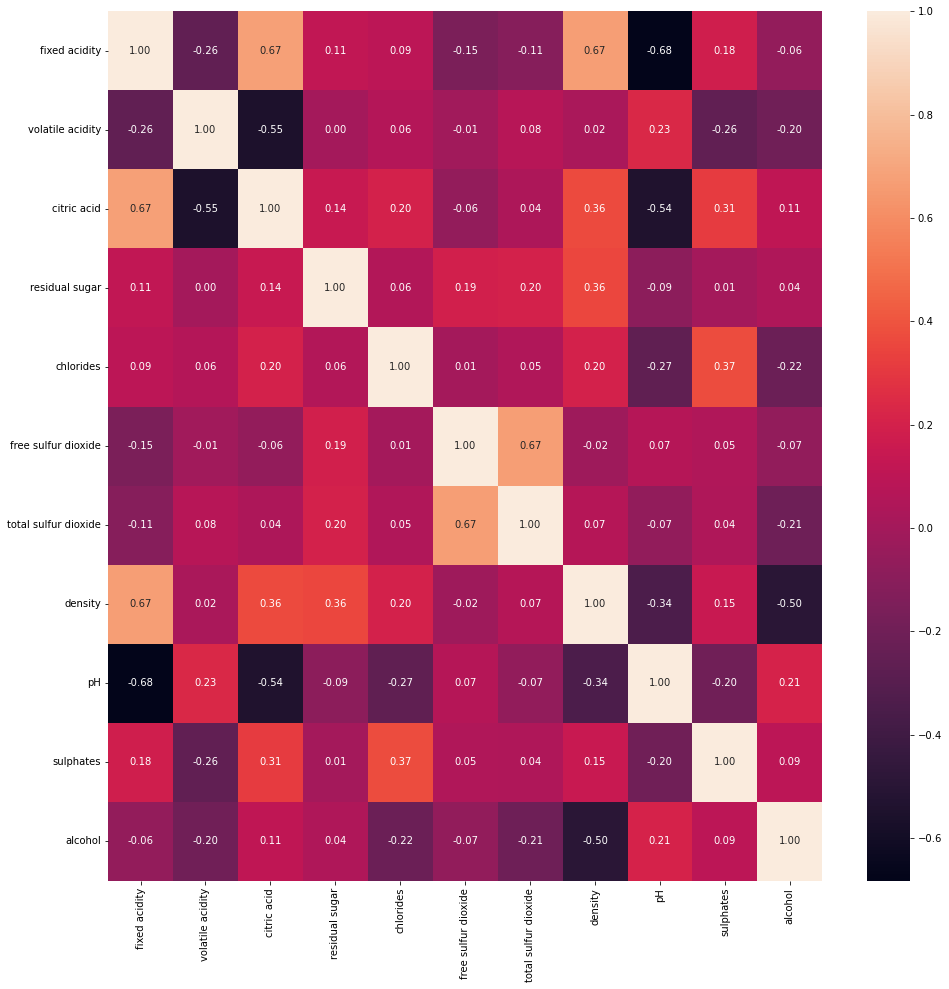

In [8]:
plt.figure(figsize=(16,16))
sns.heatmap(x.corr(), annot=True, fmt='.2f')

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=10)

# Обучение моделей

## AffinityPropagation

In [10]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score

model =  AffinityPropagation().fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#adj_train = adjusted_mutual_info_score(y_pred_train, y_train)
#adj_valid = adjusted_mutual_info_score(y_pred_valid, y_valid)

#print("ADJ train: %.2f" %adj_train)
#print("ADJ valid: %.2f" %adj_valid)

## AgglomerativeClustering

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score

model =  AffinityPropagation().fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#adj_train = adjusted_mutual_info_score(y_pred_train, y_train)
#adj_valid = adjusted_mutual_info_score(y_pred_valid, y_valid)

#print("ADJ train: %.2f" %adj_train)
#print("ADJ valid: %.2f" %adj_valid)
y_pred_train

/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(


array([-1, -1, -1, ..., -1, -1, -1])

## Birch

In [12]:
from sklearn.cluster import Birch
from sklearn.metrics import adjusted_mutual_info_score

model =  Birch(n_clusters=6).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([1, 0, 2, 0, 1, 1, 1, 1, 2, 3, 1, 0, 0, 5, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 3, 0, 2, 3, 2, 0, 3, 0, 0, 1, 1, 0, 1, 3, 1, 0, 0, 0, 3, 2,
       3, 1, 2, 0, 1, 3, 3, 1, 1, 1, 0, 0, 0, 3, 3, 3, 1, 3, 1, 1, 3, 3,
       0, 0, 3, 2, 0, 0, 0, 3, 0, 0, 2, 3, 0, 1, 1, 3, 0, 3, 1, 0, 3, 0,
       0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 2, 1, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0,
       3, 1, 2, 0, 3, 3, 3, 3, 1, 2, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 1, 3,
       0, 0, 3, 1, 0, 3, 3, 2, 1, 0, 3, 0, 0, 0, 1, 3, 1, 1, 0, 2, 1, 2,
       2, 3, 2, 3, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 3, 3,
       0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 3, 2, 1, 1, 2, 0, 2,
       1, 0, 3, 2, 2, 3, 3, 0, 0, 1, 3, 1, 0, 2, 0, 3, 0, 0, 1, 0, 3, 3,
       1, 1, 4, 3, 1, 0, 0, 0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 3, 0,
       0, 1, 2, 2, 0, 3, 1, 2, 0, 0, 0, 3, 0, 3, 1, 2, 1, 1, 3, 0, 1, 3,
       0, 1, 3, 1, 0, 2, 3, 0, 0, 3, 2, 3, 3, 3, 2, 0, 2, 1, 0, 1, 1, 0,
       2, 1, 3, 2, 1, 3, 1, 0, 0, 1, 3, 0, 3, 0, 0,

## DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score

model = DBSCAN().fit(x_train)

y_pred_train = model.labels_
y_pred_valid = model.labels_

#y_pred_train
y_pred_valid

array([-1, -1, -1, ..., -1, -1, -1])

## KMeans

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

model = KMeans(n_clusters=6, random_state=10).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([0, 0, 3, 0, 0, 3, 3, 5, 3, 5, 3, 0, 0, 4, 0, 0, 5, 2, 5, 0, 0, 2,
       0, 0, 0, 0, 3, 0, 3, 0, 5, 5, 0, 2, 2, 0, 3, 5, 2, 0, 2, 2, 0, 3,
       5, 3, 3, 2, 2, 5, 5, 2, 2, 3, 0, 2, 0, 5, 0, 5, 2, 5, 2, 3, 0, 0,
       5, 0, 5, 3, 2, 0, 0, 5, 0, 0, 3, 3, 2, 3, 2, 5, 2, 5, 3, 0, 0, 0,
       0, 5, 3, 2, 2, 0, 5, 0, 0, 0, 3, 2, 2, 0, 5, 2, 0, 0, 0, 2, 3, 0,
       5, 2, 3, 0, 0, 5, 0, 5, 5, 3, 0, 5, 2, 5, 5, 0, 0, 5, 5, 0, 0, 5,
       2, 2, 5, 2, 2, 3, 5, 3, 3, 0, 5, 5, 0, 5, 5, 0, 1, 3, 0, 3, 5, 3,
       3, 5, 3, 0, 0, 2, 3, 2, 3, 3, 3, 1, 2, 2, 0, 2, 0, 2, 3, 2, 0, 3,
       0, 0, 5, 2, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 3, 3, 0, 3,
       3, 2, 2, 3, 3, 5, 5, 0, 5, 3, 0, 3, 0, 3, 0, 5, 2, 0, 3, 0, 0, 0,
       0, 3, 1, 2, 3, 0, 2, 0, 5, 5, 0, 3, 0, 5, 5, 0, 5, 0, 0, 0, 0, 0,
       0, 2, 3, 3, 0, 0, 5, 3, 0, 2, 0, 5, 0, 5, 3, 1, 2, 2, 3, 0, 3, 5,
       0, 3, 5, 2, 2, 3, 5, 2, 0, 3, 3, 5, 3, 0, 3, 0, 3, 3, 0, 2, 5, 0,
       3, 3, 5, 3, 2, 5, 2, 0, 0, 2, 0, 0, 0, 0, 2,

## BisectingKMeans

In [15]:
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import adjusted_mutual_info_score

model = BisectingKMeans(n_clusters=6, random_state=10).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_validv

ImportError: cannot import name 'BisectingKMeans' from 'sklearn.cluster' (/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/cluster/__init__.py)

## MiniBatchKMeans

In [16]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_mutual_info_score

model = MiniBatchKMeans(n_clusters=6, random_state=10).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([2, 0, 1, 0, 2, 1, 1, 3, 2, 3, 1, 0, 0, 4, 2, 0, 3, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 3, 2, 0, 0, 0, 2, 1,
       3, 1, 2, 0, 0, 3, 3, 1, 3, 1, 0, 0, 0, 3, 0, 3, 0, 3, 3, 2, 2, 2,
       3, 0, 3, 1, 0, 0, 0, 3, 0, 0, 2, 3, 0, 2, 1, 3, 0, 3, 2, 0, 2, 0,
       0, 3, 1, 2, 0, 0, 3, 0, 2, 0, 2, 2, 2, 0, 3, 0, 0, 0, 2, 0, 1, 0,
       3, 1, 1, 0, 0, 3, 2, 3, 3, 1, 0, 3, 0, 2, 3, 0, 0, 3, 3, 0, 2, 3,
       0, 0, 3, 1, 0, 2, 3, 1, 2, 0, 3, 3, 0, 3, 3, 0, 5, 2, 0, 1, 3, 1,
       1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 5, 1, 1, 0, 0, 0, 1, 3, 0, 0, 2,
       0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1,
       1, 0, 3, 1, 2, 3, 3, 0, 3, 2, 3, 1, 0, 1, 0, 3, 0, 2, 1, 0, 0, 3,
       2, 1, 5, 3, 1, 0, 0, 0, 3, 3, 0, 1, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 3, 1, 0, 0, 0, 3, 0, 3, 1, 5, 1, 2, 2, 3, 1, 3,
       0, 2, 2, 3, 0, 2, 3, 0, 0, 1, 1, 3, 2, 2, 2, 0, 1, 1, 0, 3, 3, 0,
       1, 2, 3, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 3,

## MeanShift

In [17]:
from sklearn.cluster import MeanShift
from sklearn.metrics import adjusted_mutual_info_score

model = MeanShift(bandwidth=2).fit(x_train)

y_pred_train = model.predict(x_train)
y_pred_valid = model.predict(x_valid)

#y_pred_train
y_pred_valid

array([ 1,  0, 41,  0,  0,  3,  3, 40, 40, 86,  1,  0,  0,  2,  0, 75, 81,
        0, 60, 75,  0,  0,  0,  0,  0,  0, 10,  0,  1, 82, 69, 81,  0,  1,
        1,  0,  1,  0,  1,  0,  0,  0,  0, 41, 46,  3,  1, 81,  5, 34,  1,
        1, 72,  1,  0,  5,  0, 47,  0, 69,  0,  9,  1,  1,  0,  0, 86,  0,
        0, 13,  0,  0,  0,  0,  0,  0,  1, 46,  0,  1,  1, 15,  0,  0,  1,
        0,  0, 75,  0, 33,  1,  1,  5, 82, 81,  0,  0,  0, 41,  1,  1,  0,
       33, 92,  0,  0,  0,  5,  1,  0,  0,  1, 31,  0,  0,  0,  0, 86, 21,
        8,  0, 86,  0,  0, 81, 12,  0,  0, 47, 90,  7, 69, 28,  0,  0,  1,
       92,  0, 47, 13,  1,  0,  0,  0,  0,  0, 33, 82,  6, 73,  0, 13, 59,
       41, 31,  4, 13,  0,  4,  5,  1,  1,  1, 13,  1, 24,  3,  1,  0,  5,
        0, 72,  1, 72,  0, 44, 58,  0,  0,  1,  5, 81,  0,  0,  0,  0,  0,
        3,  0,  0,  0,  1, 41,  1,  7,  1,  0,  1,  1, 81,  1, 41,  1, 33,
       33,  0, 81,  1, 44,  3,  0, 13,  0, 59, 12,  0, 15,  0,  0,  0, 73,
        1, 16,  0,  1, 86

## OPTICS

In [18]:
from sklearn.cluster import OPTICS
from sklearn.metrics import adjusted_mutual_info_score

model = OPTICS().fit(x_train)

y_pred_train = model.labels_
y_pred_valid = model.labels_

#y_pred_train
y_pred_valid

array([-1, 10, -1, ..., -1, 19, 28])